# 2.2 模型评估方法

## 1.留出法

将初始数据集 $D$ 划分为两个互斥的集合$D_{train}$和$D_{test}$,满足
$$
    D_{train} \cap D_{test} = \emptyset \\
    D_{train} \cup D_{test} = D
$$

注意:
- 训练集与测试集尽量保持数据分布的一致性 --> 分层采样
- 多次划分方式取平均情况（避免划分方式的随机性）
- 训练集 : 测试集 (2/3 ~ 4/5)

### 1.1 加载数据集

In [10]:
import numpy as np
import pandas as pd

df = pd.read_csv('../../Datasets/iris.data', header = None)
# show the first 5 items
df.head()
# show the last 5 items
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [11]:
# get the data
y = df.iloc[:, 4].values
print("dataset has {} items, unique types: {}".format(len(y), np.unique(y)))

dataset has 150 items, unique types: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [14]:
# we need to transform the y from characters to some specific label
# perform preprocessing
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
y = labelEncoder.fit_transform(y)

In [16]:
# we select 2 features, so that we can observe clearly
X = df.iloc[:, [2, 3]].values
X.shape

(150, 2)

### 1.2 划分训练集，测试集(使用留出法)
取10次的平均情况

In [30]:
from sklearn.model_selection import train_test_split
# StandardScaler perform standardrization
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

N = 10
scores = 0.0

for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)
    
    sc = StandardScaler()
    sc.fit(X_train)
    X_train = sc.transform(X_train)
    X_test = sc.transform(X_test)

    lr = LogisticRegression(solver='lbfgs', multi_class='auto')
    lr.fit(X_train, y_train)
    score = lr.score(X_test, y_test)
    
    scores = scores + score
    print("iter {} : Accuracy : {}".format(i + 1, score))

print("Average Accuracy: {}".format(scores/N))
    

iter 1 : Accuracy : 0.9555555555555556
iter 2 : Accuracy : 0.9555555555555556
iter 3 : Accuracy : 1.0
iter 4 : Accuracy : 0.9555555555555556
iter 5 : Accuracy : 0.9555555555555556
iter 6 : Accuracy : 0.9555555555555556
iter 7 : Accuracy : 1.0
iter 8 : Accuracy : 0.9777777777777777
iter 9 : Accuracy : 0.9777777777777777
iter 10 : Accuracy : 0.9555555555555556
Average Accuracy: 0.968888888888889


## 2. 使用交叉验证法(Cross Validation)

将初始数据集 $D$ 划分为$k$个互斥的集合$ D_1, D_2, \cdots, D_k $,满足
$$
    \forall \; i \neq j, D_i \cap D_j = \emptyset \\
    D_1 \cup D_2 \cup \cdots \cup D_k = D
$$

据此规则，有$k$种划分方式，取这$k$次测试结果的平均值.

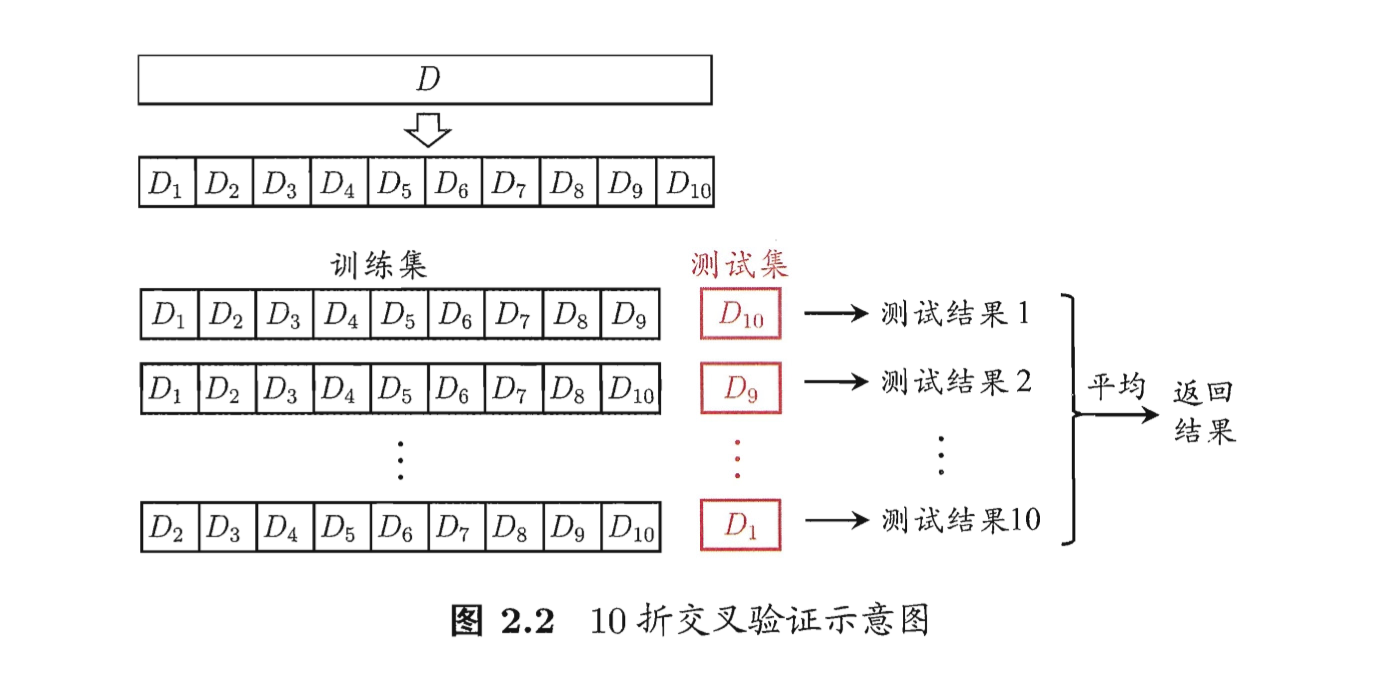



## 2.1 交叉验证实现

In [31]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits = 10, random_state = 1).split(X, y)
scores = []
lr = LogisticRegression(solver='lbfgs', multi_class='auto', C = 100.0, random_state = 1)

for k, (train, test) in enumerate(kfold):
    # X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
    lr.fit(X[train], y[train])
    score = lr.score(X[test], y[test])
    scores.append(score)
    print('Fold {}: Accuracy: {}'.format(k + 1, score))

print('CV accuracy: {} +/- {}'.format(np.mean(scores), np.std(scores)))

Fold 1: Accuracy: 1.0
Fold 2: Accuracy: 0.9333333333333333
Fold 3: Accuracy: 1.0
Fold 4: Accuracy: 0.9333333333333333
Fold 5: Accuracy: 0.9333333333333333
Fold 6: Accuracy: 0.9333333333333333
Fold 7: Accuracy: 0.8666666666666667
Fold 8: Accuracy: 1.0
Fold 9: Accuracy: 1.0
Fold 10: Accuracy: 1.0
CV accuracy: 0.96 +/- 0.044221663871405324


## 3.自助法
放回的抽样选择



In [32]:
import random

def BootStrap(num):
    slice = []
    while(len(slice) < num):
        p = random.randrange(0, num)
        slice.append(p)
    return slice

def getDataByIndex(x, y, index):
    xx = []
    yy = []
    
    for i in index:
        xx.append(x[i])
        yy.append(y[i])
        
    return xx, yy

N = 10
N_samples = len(y)
all_index = set(range(N_samples))
lr = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', C = 100.0, random_state = 1)

scores = []
for i in range(N):
    train_index = BootStrap(N_samples)
    unique_index = np.unique(train_index)
    test_index = list(all_index - set(unique_index))
    
    X_train, y_train = getDataByIndex(X, y, train_index)
    X_test, y_test = getDataByIndex(X, y, test_index)
    
    lr.fit(X_train, y_train)
    score = lr.score(X_test, y_test)
    
    print('iter {} - Accuracy: {}'.format(i + 1, score))
    scores.append(score)
    
print('BootStrap: Accuracy: {} +/- {}'.format(np.mean(scores), np.std(scores)))

    

iter 1 - Accuracy: 0.9818181818181818
iter 2 - Accuracy: 0.9629629629629629
iter 3 - Accuracy: 0.9649122807017544
iter 4 - Accuracy: 0.9814814814814815
iter 5 - Accuracy: 0.9833333333333333
iter 6 - Accuracy: 0.9615384615384616
iter 7 - Accuracy: 0.96
iter 8 - Accuracy: 0.9433962264150944
iter 9 - Accuracy: 0.9137931034482759
iter 10 - Accuracy: 0.9629629629629629
BootStrap: Accuracy: 0.9616198994662509 +/- 0.019775007097257366
